In [5]:
import zipfile

# Define the path to the zip file and the directory to extract to
zip_file_path = 'land_cover.zip'
extract_to_path = './'

# Create a ZipFile object and extract all contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


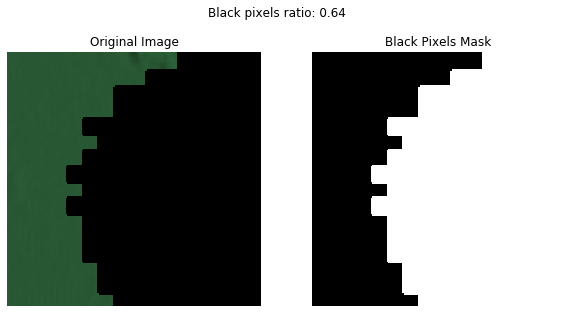

Image land_cover/dynamic_world_image_1.tif has a significant amount of black pixels.


In [23]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to extract TIFF image
def extract_tiff(image_path):
    with rasterio.open(image_path) as src:
        red_band = src.read(1)
        green_band = src.read(2)
        blue_band = src.read(3)

        rgb_img = np.dstack((red_band, green_band, blue_band))

    return rgb_img

# Function to detect black color
def detect_black(image, tolerance=0.1):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    mask = np.all([
        red_channel <= tolerance,
        green_channel <= tolerance,
        blue_channel <= tolerance
    ], axis=0)

    black_pixels_ratio = np.sum(mask) / mask.size

    return mask, black_pixels_ratio

# Load the image
image_path = 'land_cover/dynamic_world_image_1.tif'
image = extract_tiff(image_path)

# Detect black pixels
mask, black_pixels_ratio = detect_black(image)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Black Pixels Mask')
plt.axis('off')

plt.suptitle(f'Black pixels ratio: {black_pixels_ratio:.2f}')
plt.show()

if black_pixels_ratio > 0.01:
    print(f"Image {image_path} has a significant amount of black pixels.")
else:
    print(f"Image {image_path} does not have a significant amount of black pixels.")

In [25]:
import os
import shutil
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to extract TIFF image
def extract_tiff(image_path):
    with rasterio.open(image_path) as src:
        red_band = src.read(1)
        green_band = src.read(2)
        blue_band = src.read(3)

        rgb_img = np.dstack((red_band, green_band, blue_band))

    return rgb_img

# Function to detect black color
def detect_black(image, tolerance=0.1):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    mask = np.all([
        red_channel <= tolerance,
        green_channel <= tolerance,
        blue_channel <= tolerance
    ], axis=0)

    black_pixels_ratio = np.sum(mask) / mask.size

    return mask, black_pixels_ratio

# Define input and output directories
input_dir = 'land_cover'
output_dir = 'new_land_cover'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each TIFF image in the input directory
count = 0
for filename in os.listdir(input_dir):
    if filename.endswith('.tif'):
        image_path = os.path.join(input_dir, filename)
        image = extract_tiff(image_path)

        # Detect black pixels
        _, black_pixels_ratio = detect_black(image)

        # Check if the image has a significant amount of black pixels
        if black_pixels_ratio <= 0.01:
            new_image_path = os.path.join(output_dir, filename)
            shutil.copy(image_path, new_image_path)
        
        count += 1
        if count % 1000 == 0:
            print(f"Processed {count} images")

print("Processing complete")

Processed 1000 images
Processed 2000 images
Processed 3000 images
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Processed 8000 images
Processed 9000 images
Processed 10000 images
Processed 11000 images
Processed 12000 images
Processed 13000 images
Processed 14000 images
Processed 15000 images
Processed 16000 images
Processed 17000 images
Processed 18000 images
Processed 19000 images
Processed 20000 images
Processed 21000 images
Processed 22000 images
Processed 23000 images
Processed 24000 images
Processed 25000 images
Processed 26000 images
Processed 27000 images
Processed 28000 images
Processed 29000 images
Processed 30000 images
Processed 31000 images
Processed 32000 images
Processed 33000 images
Processed 34000 images
Processed 35000 images
Processed 36000 images
Processed 37000 images
Processed 38000 images
Processed 39000 images
Processed 40000 images
Processed 41000 images
Processed 42000 images
Processed 43000 images
Processed 44000 imag

In [28]:
import shutil
import os

# Define the directory to be zipped
dir_to_zip = 'new_land_cover'

# Define the name of the output zip file
output_filename = 'new_land_cover_compressed'

# Ensure the directory exists
if not os.path.exists(dir_to_zip):
    print(f"Directory {dir_to_zip} does not exist.")
else:
    # Create the zip file
    shutil.make_archive(output_filename, 'zip', dir_to_zip)
    print(f"Directory {dir_to_zip} has been compressed into {output_filename}.zip")


Directory new_land_cover has been compressed into new_land_cover_compressed.zip


In [34]:
import os

# Define the input directory
input_dir = 'new_land_cover'

# Count the number of files in the input directory
file_count = len([name for name in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, name))])

print(f"There are {file_count} files in the {input_dir} directory.")

There are 41289 files in the new_land_cover directory.


In [36]:
import pandas as pd
import os
import shutil

# Read the metadata CSV file
metadata = pd.read_csv('metadata.csv', header=None)

# Define the input and output directories
input_dir = 'new_land_cover'
output_dir = 'land_cover_new'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Log file to keep track of missing files
log_file_path = 'missing_files.log'

# Clear log file if it exists
if os.path.exists(log_file_path):
    os.remove(log_file_path)

# Loop through each row in the metadata and copy/rename the corresponding file
for index, row in metadata.iterrows():
    # Construct the original filename based on the index
    original_filename = f"dynamic_world_image_{index + 1}.tif"
    original_filepath = os.path.join(input_dir, original_filename)
    
    # Construct the new filename
    new_filename = f"{row[0]}-{row[1]}.tif"
    new_filepath = os.path.join(output_dir, new_filename)
    
    # Copy and rename the file if it exists
    if os.path.exists(original_filepath):
        shutil.copy(original_filepath, new_filepath)
        if (index + 1) % 1000 == 0:
            print(f"Processed {index + 1} files.")
    else:
        # Log missing files
        with open(log_file_path, 'a') as log_file:
            log_file.write(f"Missing file: {original_filename}\n")

print("Processing complete.")

# Check the number of files in the output directory
output_file_count = len([name for name in os.listdir(output_dir) if os.path.isfile(os.path.join(output_dir, name))])
print(f"There are {output_file_count} files in the {output_dir} directory.")


Processed 1000 files.
Processed 2000 files.
Processed 3000 files.
Processed 4000 files.
Processed 9000 files.
Processed 10000 files.
Processed 12000 files.
Processed 13000 files.
Processed 15000 files.
Processed 16000 files.
Processed 17000 files.
Processed 18000 files.
Processed 22000 files.
Processed 23000 files.
Processed 25000 files.
Processed 28000 files.
Processed 29000 files.
Processed 30000 files.
Processed 31000 files.
Processed 32000 files.
Processed 34000 files.
Processed 37000 files.
Processed 40000 files.
Processed 43000 files.
Processed 45000 files.
Processed 46000 files.
Processed 47000 files.
Processed 49000 files.
Processed 50000 files.
Processed 53000 files.
Processed 54000 files.
Processed 55000 files.
Processed 56000 files.
Processed 57000 files.
Processed 61000 files.
Processed 62000 files.
Processing complete.
There are 41289 files in the land_cover_new directory.


In [37]:
import shutil
import os

# Define the directory to be zipped
dir_to_zip = 'land_cover_new'

# Define the name of the output zip file
output_filename = 'land_cover_new'

# Ensure the directory exists
if not os.path.exists(dir_to_zip):
    print(f"Directory {dir_to_zip} does not exist.")
else:
    # Create the zip file
    shutil.make_archive(output_filename, 'zip', dir_to_zip)
    print(f"Directory {dir_to_zip} has been compressed into {output_filename}.zip")


Directory land_cover_new has been compressed into land_cover_new.zip


In [38]:
import os
import shutil
import re

# Define the input and output directories
input_dir = 'land_cover_new'
output_dir = 'land_cover_sample'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Dictionary to store the first image for each region
first_images = {}

# Regular expression to match the filename pattern
pattern = re.compile(r"(.+)-(\d+)\.tif")

# Loop through each file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".tif"):
        match = pattern.match(filename)
        if match:
            region_name = match.group(1)
            file_number = int(match.group(2))
            
            # If this region is not yet in the dictionary, add it
            if region_name not in first_images:
                first_images[region_name] = (filename, file_number)
            else:
                # Update to the lowest numbered file if found a smaller number
                if file_number < first_images[region_name][1]:
                    first_images[region_name] = (filename, file_number)

# Copy the first image for each region to the output directory
for region_name, (first_filename, _) in first_images.items():
    original_filepath = os.path.join(input_dir, first_filename)
    new_filepath = os.path.join(output_dir, first_filename)
    shutil.copy(original_filepath, new_filepath)

print("Sampling complete.")


Sampling complete.


In [39]:
import shutil
import os

# Define the directory to be zipped
dir_to_zip = 'land_cover_sample'

# Define the name of the output zip file
output_filename = 'land_cover_sample'

# Ensure the directory exists
if not os.path.exists(dir_to_zip):
    print(f"Directory {dir_to_zip} does not exist.")
else:
    # Create the zip file
    shutil.make_archive(output_filename, 'zip', dir_to_zip)
    print(f"Directory {dir_to_zip} has been compressed into {output_filename}.zip")


Directory land_cover_sample has been compressed into land_cover_sample.zip
